The dataset contains various attributes on residential homes in Ames, Iowa, USA, along with the prices for which they were sold.

The source of the data: https://openml.org

The dataset contains the following columns:

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageArea: Size of garage in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

PoolArea: Pool area in square feet

YrSold: Year Sold (YYYY)

SalePrice: the price of the house (target)

Perform EDA and suggest what transformation steps might be necessary before a predictive model of house prices can be developed.



In [774]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(palette="Set2")

In [775]:
# load the data set and display information on its columns
df = pd.read_csv("ames_housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1418 non-null   object 
 1   LotArea        1417 non-null   float64
 2   Street         1406 non-null   object 
 3   Utilities      1414 non-null   object 
 4   OverallCond    1417 non-null   float64
 5   YearBuilt      1418 non-null   float64
 6   TotalBsmtSF    1417 non-null   float64
 7   GrLivArea      1412 non-null   float64
 8   FullBath       1411 non-null   float64
 9   HalfBath       1414 non-null   float64
 10  BedroomAbvGr   1405 non-null   float64
 11  KitchenAbvGr   1418 non-null   float64
 12  TotRmsAbvGrd   1423 non-null   float64
 13  GarageArea     1410 non-null   float64
 14  OpenPorchSF    1426 non-null   float64
 15  EnclosedPorch  1409 non-null   float64
 16  PoolArea       1421 non-null   float64
 17  YrSold         1422 non-null   float64
 18  SalePric

# Train-test split

Split the data into the training and test parts, using 20% for testing. Use random sampling.

In [776]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.2, random_state=7)
print(f"{trainset.shape[0]} training and {testset.shape[0]} test instances")

1168 training and 292 test instances


# Univariate analysis

## Distribution of categorical variables

In [777]:
for col in trainset.select_dtypes(include=['object']).columns:
    print(trainset[col].value_counts())
    print()

MSZoning
RL         893
RM         170
FV          51
RH          14
C (all)      8
Name: count, dtype: int64

Street
Pave    1118
Grvl       5
Name: count, dtype: int64

Utilities
AllPub    1134
NoSeWa       1
Name: count, dtype: int64



## Distribution of numerical variables

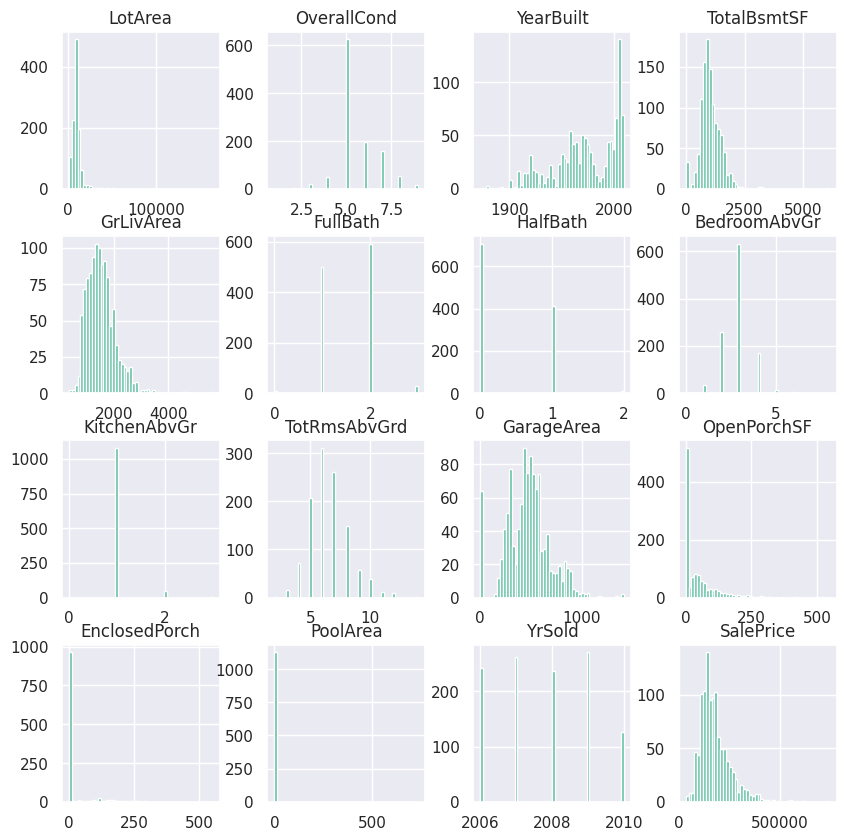

In [778]:
_ = trainset.hist(bins=50, figsize=(10,10))

# Bivariate analysis

## Correlation matrix

In [779]:
corr_matrix = trainset.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,YrSold,SalePrice
LotArea,1.000,-0.007,0.035,0.287,0.316,0.136,0.050,0.122,-0.015,0.221,0.246,0.097,-0.015,0.136,0.004,0.279
OverallCond,-0.007,1.000,-0.353,-0.160,-0.081,-0.176,-0.068,0.014,-0.076,-0.044,-0.114,-0.028,0.056,-0.013,0.069,-0.070
YearBuilt,0.035,-0.353,1.000,0.390,0.205,0.474,0.244,-0.057,-0.145,0.112,0.469,0.173,-0.388,0.003,-0.014,0.532
TotalBsmtSF,0.287,-0.160,0.390,1.000,0.459,0.319,-0.031,0.080,-0.064,0.289,0.483,0.237,-0.093,0.171,-0.015,0.594
GrLivArea,0.316,-0.081,0.205,0.459,1.000,0.628,0.414,0.541,0.106,0.826,0.484,0.317,0.000,0.250,-0.034,0.701
FullBath,0.136,-0.176,0.474,0.319,0.628,1.000,0.130,0.373,0.127,0.553,0.408,0.246,-0.123,0.098,-0.032,0.573
HalfBath,0.050,-0.068,0.244,-0.031,0.414,0.130,1.000,0.215,-0.062,0.349,0.180,0.198,-0.087,0.023,-0.022,0.294
BedroomAbvGr,0.122,0.014,-0.057,0.080,0.541,0.373,0.215,1.000,0.225,0.699,0.122,0.089,0.039,0.093,-0.048,0.209
KitchenAbvGr,-0.015,-0.076,-0.145,-0.064,0.106,0.127,-0.062,0.225,1.000,0.256,-0.044,-0.077,0.055,-0.014,0.040,-0.128
TotRmsAbvGrd,0.221,-0.044,0.112,0.289,0.826,0.553,0.349,0.699,0.256,1.000,0.356,0.224,-0.014,0.134,-0.049,0.543


## Scatter matrix

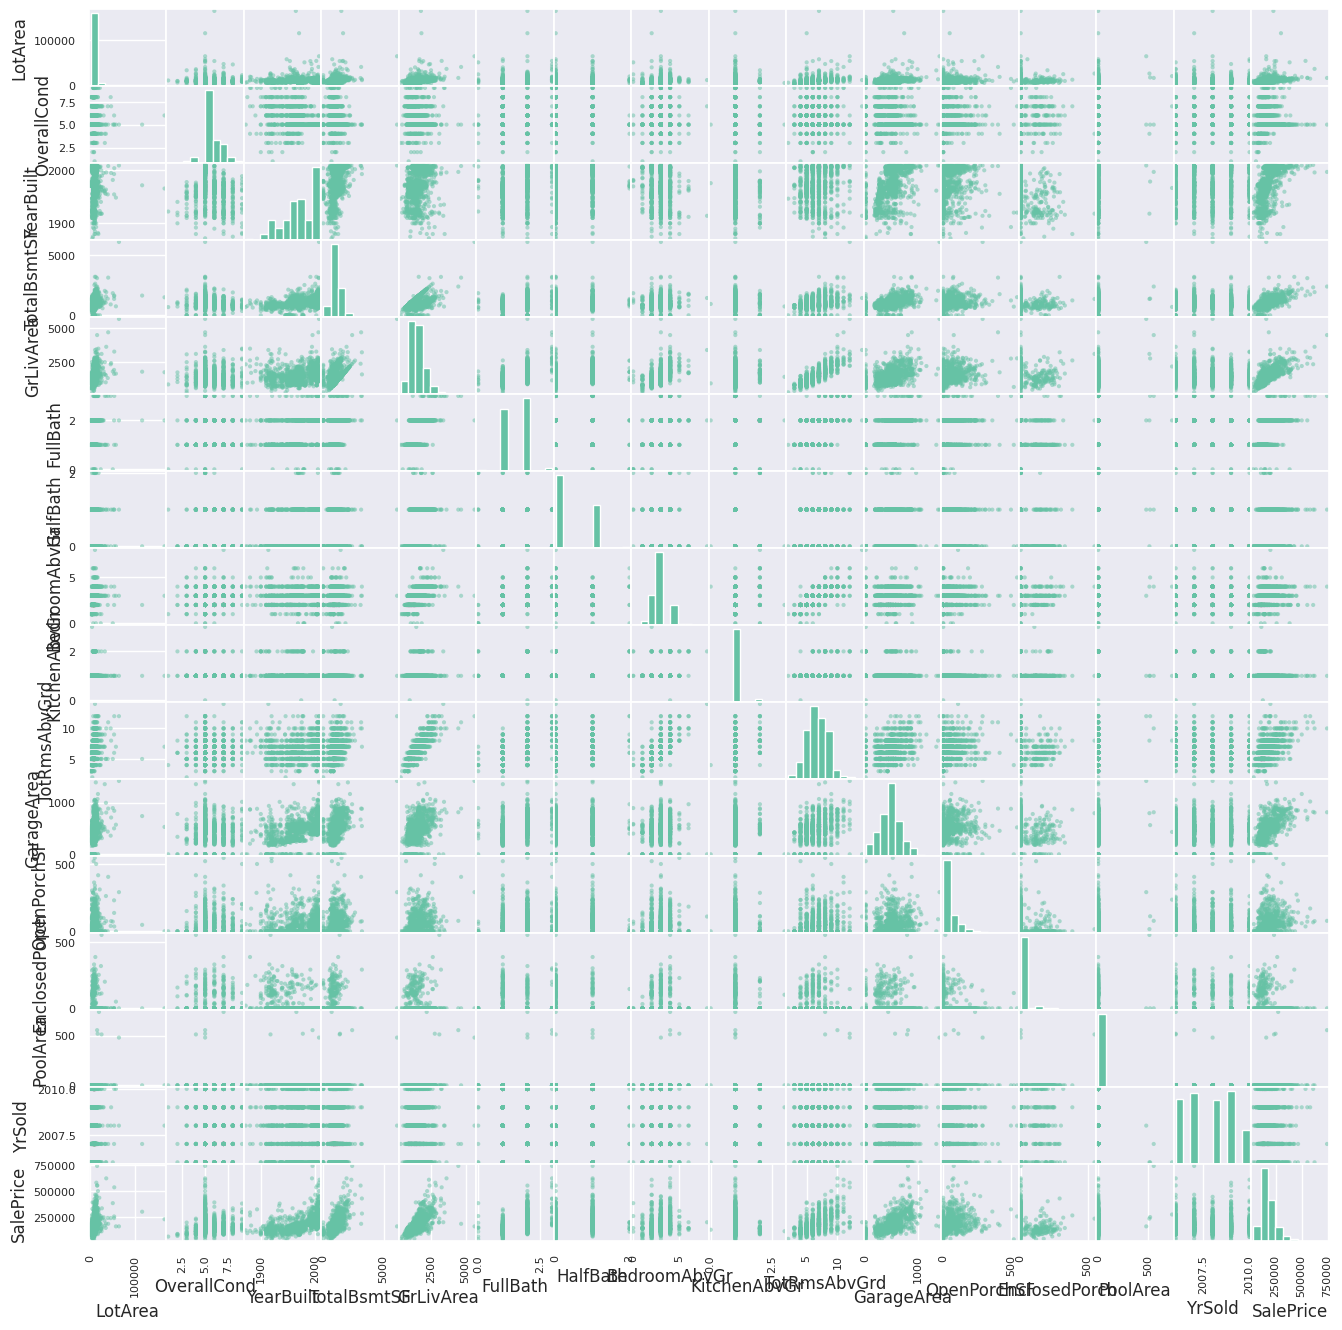

In [780]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(trainset, figsize=(16, 16))

## Correlations with the target variable

In [781]:
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
GrLivArea,0.700586
GarageArea,0.628062
TotalBsmtSF,0.593799
FullBath,0.573104
TotRmsAbvGrd,0.543370
YearBuilt,0.531676
OpenPorchSF,0.299312
HalfBath,0.293793
LotArea,0.278698
